In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 && pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/priyansh/.cache/torch/hub/ultralytics_yolov5_master
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

YOLOv5 🚀 2023-7-27 Python-3.11.3 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = 'https://insurifycdn.com/wp-content/uploads/2022/01/shutterstock_120564112-e1643051758592.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 800x1200 28 cars
Speed: 160.6ms pre-process, 166.6ms inference, 0.9ms NMS per image at shape (1, 3, 448, 640)


In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
results.render()

[array([[[201, 174, 163],
         [195, 174, 157],
         [185, 167, 145],
         ...,
         [109,  67,   9],
         [107,  64,  11],
         [105,  61,  12]],
 
        [[193, 163, 139],
         [197, 169, 145],
         [202, 178, 152],
         ...,
         [110,  68,  10],
         [108,  65,  12],
         [106,  63,  12]],
 
        [[158, 119,  76],
         [168, 130,  93],
         [181, 146, 114],
         ...,
         [112,  67,   8],
         [110,  65,   8],
         [108,  62,  10]],
 
        ...,
 
        [[ 23,  12,   8],
         [ 23,  12,   8],
         [ 23,  12,   8],
         ...,
         [ 42,  30,  40],
         [ 50,  39,  45],
         [ 62,  51,  55]],
 
        [[ 23,  12,   8],
         [ 23,  12,   8],
         [ 24,  13,   9],
         ...,
         [ 43,  31,  41],
         [ 53,  42,  48],
         [ 68,  58,  59]],
 
        [[ 23,  12,   8],
         [ 24,  13,   9],
         [ 24,  13,   9],
         ...,
         [ 44,  32,  42],
  

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [17]:
import uuid   # Unique identifier
import os
import time

In [18]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [19]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [20]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))


data/images/awake.ac5ab0da-2d46-11ee-b043-72c7abced730.jpg


In [21]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname) 

data/images/awake.ae033650-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033a10-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033b0a-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033bdc-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033ca4-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033d6c-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033e2a-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033f24-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae033fe2-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae0340a0-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae034154-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae0341fe-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae0342a8-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae03435c-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae034406-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae0344ba-2d46-11ee-b043-72c7abced730.jpg
data/images/awake.ae034582-2d46-11ee-b043-72c7abced730.j

In [22]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [23]:
!pip install pyqt5 --config-settings --confirm-license= --verbose
!pip3 install lxml
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Using pip 23.2.1 from /Users/priyansh/anaconda3/lib/python3.11/site-packages/pip (python 3.11)


In [28]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --dataset.yaml --weight yolov5s.pt --workers 2
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2


WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[

train: Scanning /Users/priyansh/Desktop/PytorchProjects/data/labels... 39 images
train: New cache created: /Users/priyansh/Desktop/PytorchProjects/data/labels.cache
val: Scanning /Users/priyansh/Desktop/PytorchProjects/data/labels.cache... 39 im

AutoAnchor: 6.15 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/exp/labels.jpg... 
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0%|          | 0/5 [00:00<?, ?it/s]WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can upda

     13/499         0G      0.061    0.01506    0.02942          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.152      0.559      0.316      0.106

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     14/499         0G    0.06938    0.01461    0.02946          7        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.133      0.975      0.164     0.0459

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     15/499         0G    0.07274    0.01341    0.02936          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.269      0.504      0.343     0.0719

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     16/49

     38/499         0G    0.05065    0.01032    0.01391          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.798      0.913      0.918      0.454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     39/499         0G    0.04666    0.01237     0.0117          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.695       0.91      0.867      0.518

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     40/499         0G    0.05102   0.009169    0.00924          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.375      0.748      0.595      0.271

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     41/49

     63/499         0G    0.04032   0.007879   0.006835          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.849      0.947       0.94      0.505

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     64/499         0G    0.04063   0.009243   0.006845          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.906      0.959      0.985      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     65/499         0G    0.03715   0.009359   0.007137          9        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.756      0.904      0.881       0.65

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     66/49

     88/499         0G    0.03582   0.005815   0.004839          2        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.977      0.976      0.995      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     89/499         0G    0.03581   0.006629   0.005309          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.931      0.975      0.971      0.663

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     90/499         0G    0.03637     0.0063   0.007828          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.985       0.95      0.984      0.735

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     91/49

    113/499         0G    0.03003   0.006714   0.005495          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39       0.84          1      0.948      0.627

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    114/499         0G    0.03472   0.004917    0.00785          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.992          1      0.995      0.773

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    115/499         0G    0.02542   0.005115   0.005433          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.823          1      0.995      0.818

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    116/49

    138/499         0G    0.03037    0.00563   0.004405          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    139/499         0G    0.02553   0.004881   0.004679          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.723      0.975       0.89      0.523

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    140/499         0G    0.03151   0.005412    0.00364          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.851

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    141/49

    163/499         0G    0.02022   0.005373    0.00418          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.987      0.991      0.995      0.746

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    164/499         0G    0.02918   0.005104   0.003944          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.994          1      0.995      0.799

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    165/499         0G    0.02545   0.004647   0.004011          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.995          1      0.995      0.846

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    166/49

    188/499         0G    0.02615   0.003634   0.007508          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.993          1      0.995       0.86

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    189/499         0G    0.02157   0.003749   0.004199          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.994          1      0.995      0.687

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    190/499         0G    0.02335   0.004188   0.003815          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.978          1      0.995      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    191/49

    213/499         0G    0.02015   0.004106    0.00348          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.815          1      0.989      0.779

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    214/499         0G    0.01795   0.005158   0.005274          8        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.915

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    215/499         0G    0.01452   0.003783    0.00346          2        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.633

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    216/49

    238/499         0G    0.02073   0.004605   0.003106          7        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.922

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    239/499         0G    0.01486   0.003456   0.003134          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.995          1      0.995      0.816

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    240/499         0G    0.02318   0.003997    0.00307          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.994          1      0.995      0.916

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    241/49

    263/499         0G    0.01416   0.004157   0.002842          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.811

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    264/499         0G    0.02204   0.003629   0.003049          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    265/499         0G    0.01781   0.004006   0.002779          7        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.985          1      0.995      0.725

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    266/49

    288/499         0G    0.02047     0.0031   0.002921          2        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.773

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    289/499         0G    0.01736   0.003735    0.00301          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.931

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    290/499         0G    0.01588    0.00309    0.00278          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.888

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    291/49

    313/499         0G    0.01498   0.003759   0.002548          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.922

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    314/499         0G    0.01502   0.003468   0.002407          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.897

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    315/499         0G    0.01282   0.003678    0.00273          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.871

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    316/49

    338/499         0G     0.0134   0.004056   0.002717          8        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.996          1      0.995      0.952

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    339/499         0G     0.0114   0.003355   0.002306          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.958

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    340/499         0G    0.01573   0.003784    0.00244          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.959

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    341/49

    363/499         0G    0.01076   0.003689   0.003168          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.946

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    364/499         0G    0.01165   0.002868   0.002035          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995       0.92

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    365/499         0G    0.01231   0.002829   0.002039          2        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.965

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    366/49

    388/499         0G    0.01225   0.003735   0.002073          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.986

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    389/499         0G    0.01123   0.003128   0.001938          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.971

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    390/499         0G    0.01152   0.003459    0.00222          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.946

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    391/49

    413/499         0G   0.009138   0.002594   0.001686          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995       0.94

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    414/499         0G   0.009582   0.003352   0.001967          8        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.954

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    415/499         0G   0.009333   0.003488   0.001757          8        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.967

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    416/49

    438/499         0G   0.009365   0.002668   0.001764          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    439/499         0G    0.00797   0.003171   0.001556         10        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.986

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    440/499         0G   0.008371    0.00211   0.001459          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.986

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    441/49

    463/499         0G   0.007908    0.00346    0.00146          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.988

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    464/499         0G   0.008854    0.00265   0.001712          3        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    465/499         0G   0.008956   0.003012   0.001467          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.993

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    466/49

    488/499         0G   0.006987   0.003171   0.001334          6        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    489/499         0G   0.008492   0.002895   0.001356          5        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    490/499         0G    0.00616   0.002429   0.001366          4        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         68         39      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    491/49

In [30]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/priyansh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-7-28 Python-3.11.3 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [51]:
img = os.path.join('data', 'images', 'drowsy.2fa06c50-2cc0-11ee-9449-72c7abced730.jpg')

In [52]:
results = model(img)

In [53]:
results.print()

image 1/1: 1080x1920 1 drowsy
Speed: 45.7ms pre-process, 131.3ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


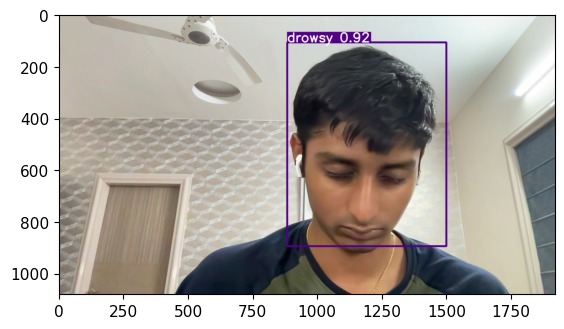

In [54]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [50]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()